In [1]:
# 2022-Dez-28
# Jupyter notebook for tests with OGRaySpY modules

In [2]:
import numpy as np
from numpy.random import default_rng
from scipy import special
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

from spec_class import Spec

In [3]:
# https://lmfit.github.io/lmfit-py/builtin_models.html
from lmfit import Model, minimize, Parameters, report_fit, fit_report, printfuncs
from lmfit.models import LinearModel, StepModel, ExponentialModel, LorentzianModel
from lmfit.models import GaussianModel, SkewedGaussianModel, ExpressionModel

In [4]:
from ograyspy_class import Ograyspy

In [5]:
ogra = Ograyspy(batch_mode=False)
print('Objeto ogra: Ograyspy criado.')
print(f'ogra.info_plat: {ogra.info_plat}')
print(f'ogra.info_mach: {ogra.info_mach}')
print(f'ogra.info_syst: {ogra.info_syst}')
print(f'ogra.info_node: {ogra.info_node}')
print(f'ogra.home_path: {ogra.home_path}')

Objeto ogra: Ograyspy criado.
ogra.info_plat: Windows-10-10.0.19044-SP0
ogra.info_mach: AMD64
ogra.info_syst: Windows
ogra.info_node: I56611
ogra.home_path: C:\Users\mmaduar


In [6]:
# f_name = '../../Genie_Transfer/Si/SI2019/SI04119.Chn'
# f_name = '../gamma/spectra/ALMERA-2016/alm_samp5_sedim_16.IEC'

In [7]:
to_be_found = 'Genie_Transfer'
# to_be_found = 'some_spectra'
print('\nogra.define_files_folder(to_be_found)')
ogra.define_files_folder(to_be_found)


ogra.define_files_folder(to_be_found)
Found folder name:  C:\Users\mmaduar\Nextcloud\Genie_Transfer
Partes:  ('C:\\', 'Users', 'mmaduar', 'Nextcloud', 'Genie_Transfer')
No. spec files:  6868


In [8]:
# a spectrum pattern to find and test:

In [9]:
# 2022
# Se quiser ignorar o espectro aleatório, definir aqui um específico. Se não, pular.
# Vou ignorar o espectro já analisado e refazer a análise, para testes.
# 2022-Mar-24 Resolver essa questão dos nomes de arquivos em Linux e Windows
# a_spec_name = '..\\..\\Genie_Transfer\\Si\\2018\\PNR\\PRN0803.Chn'
# a_spec_name = '../../Genie_Transfer/Si/2018/PNR/PRN0803.Chn'
# a_spec_name = '../../Genie_Transfer/Si/2018/CTP/CTP0908-2.Chn'
# Esse é um que dá problema na baseline perto do 159 keV do I-123:
# a_spec_name = '../../Genie_Transfer/Si/2018/CCI/CCI1508I.Chn'
# Precisa quebrar mais a baseline: Ok, consertado!!!
# 2022: Já usando o GMX:
# a_spec_name = '../../Genie_Transfer/Filtros/2022/Cci/CCI1603-I.Chn'



In [10]:

# 2022-out-7: Excelente espectro para testes, tenho usado ultimamente:
# a_pattern = 'Si/SI2018/SI11318.Chn'
# 2022-nov-16: outros espectros:
# a_pattern = "Filtros/2022/Cci/CCI1603-I.Chn"
# a_pattern = "Filtros/2022/Cci/CCI2302-I.Chn"

# a_pattern = "Eso_non_existe.Chn"

# 2022-Dez-21 Buscando outro espectro
# a_pattern = 'CCI1603-I'
# 2022-Dez-28 Este é um espectro mais recente:
# a_pattern = 'SI09722.Chn'
# 2022-Dez-28 Este é um espectro mais recente que posso comparar com saída do Genie:
a_pattern = 'SI06322.Chn'

In [11]:


print(f'\n\nogra.select_spectrum({a_pattern})')
ogra.select_spectrum(a_pattern)
print(f'A spec name: {ogra.a_spec_name}')
print(f'Reduced file name: {ogra.reduced_f_name}')

# AQUI: ativar gener_dataframe qdo estiver pronto.
ogra.perform_total_analysis(peak_sd_fact=3.0, gener_dataframe=True)
# print(ogra.a_spec.spec_pks_df)



ogra.select_spectrum(SI06322.Chn)
Existing:
Achou! indice=62, nomearq = almera22/user2023/SI2022/SI06322.Chn
Final choices:
spectra_path: C:\Users\mmaduar\Nextcloud\Genie_Transfer
a_spec_name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\almera22\user2023\SI2022\SI06322.Chn
reduced_f_name: almera22/user2023/SI2022/SI06322.Chn
A spec name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\almera22\user2023\SI2022\SI06322.Chn
Reduced file name: almera22/user2023/SI2022/SI06322.Chn
Starting Ograyspy.perform_total_analysis...
Starting Spec.total_analysis...
Finish Spec.total_analysis!
Finished Ograyspy.perform_total_analysis!


In [12]:
vars(ogra.a_spec.channel_energy_calib)

{'calib_kind': 'channel energy',
 'p_en': Polynomial([-1.99049842,  0.61104035,  0.        ], domain=[-1,  1], window=[-1,  1]),
 'coeffs_ch_en': array([ 0.        ,  0.61104035, -1.99049842]),
 'en_ch_calib': array([], dtype=float64),
 'chan_calib': array([], dtype=float64)}

In [13]:
ogra.a_spec.channel_energy_calib.p_en(453.5)

275.1163020133972

In [14]:
ogra.a_spec.spec_pks_df.dtypes

Series([], dtype: object)

In [15]:
ogra.call_graphics()

In [16]:
rng = np.random.default_rng()
# rints = rng.integers(low=0, high=10, size=3)

# 2022-Jun-23: Reativar após consertar o arquivo pickle:
# rints = rng.integers(pkl_df1.count()[0], size=3)
# print(rints)
# type(rints[0])
# some_spec = rints[1]
# pkl_df1.iloc[some_spec]
# a_spec_name = pkl_df1.iloc[some_spec]['FName']
# a_spec_name

In [17]:
rng

Generator(PCG64) at 0x1C31836A820

In [18]:
print(f'A spec name: {ogra.a_spec_name}')
print(f'Reduced file name: {ogra.reduced_f_name}')

A spec name: C:\Users\mmaduar\Nextcloud\Genie_Transfer\almera22\user2023\SI2022\SI06322.Chn
Reduced file name: almera22/user2023/SI2022/SI06322.Chn


In [19]:
vars(ogra)

{'info_plat': 'Windows-10-10.0.19044-SP0',
 'info_mach': 'AMD64',
 'info_syst': 'Windows',
 'info_node': 'I56611',
 'home_path': WindowsPath('C:/Users/mmaduar'),
 'spectra_path': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer'),
 'n_files': 6868,
 'a_spec_ind': 62,
 'a_spec_name': WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/user2023/SI2022/SI06322.Chn'),
 'reduced_f_name': 'almera22/user2023/SI2022/SI06322.Chn',
 'gross_counts_graphics': None,
 'pks_regions_gros': None,
 'files_list': [WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/det_c/iaeaqcb.chn'),
  WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/det_c/iaeaqcc.chn'),
  WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/det_c/IAEASW1B.chn'),
  WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/det_c/iaeaw2a.chn'),
  WindowsPath('C:/Users/mmaduar/Nextcloud/Genie_Transfer/almera22/eur_g_p_xtraf/Spiked water Sample Code 01A  Det G.Chn'),
  WindowsPa

In [20]:
# 2022-Dez-28
print(f'índice do espectro na lista: {ogra.a_spec_ind}')
ogra.reduced_names_files_list[ogra.a_spec_ind]

índice do espectro na lista: 62


'almera22/user2023/SI2022/SI06322.Chn'

In [21]:
# 2022-Dez-28: Atualizar:
# (2022-Jun-24 Lembrando como estão os defaults de total_analysis(...):
# def total_analysis(self, k_sep_pk=2.0, smoo=3000.0, widths_range=(4.0, 20.0)):)
# smoo=3000 fica razoável, mas faz umas ondas
# smoo=1500 fica horrível, faz uns abismos. Quanto menor, pior
# smoo=400 fica razoável, mas faz umas ondas
# ogra.perform_total_analysis(
#     k_sep_pk=2.0, smoo=4096, widths_range=(4.0, 20.0)
# )

In [22]:
ogra.a_spec.spec_pks_df.dtypes

Series([], dtype: object)

In [23]:
dir()

['ExponentialModel',
 'ExpressionModel',
 'GaussianModel',
 'In',
 'LinearModel',
 'LorentzianModel',
 'Model',
 'Ograyspy',
 'Out',
 'Parameters',
 'SkewedGaussianModel',
 'Spec',
 'StepModel',
 '_',
 '_12',
 '_13',
 '_14',
 '_17',
 '_19',
 '_20',
 '_22',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_pydevd_bundle',
 'a_pattern',
 'default_rng',
 'exit',
 'fit_report',
 'get_ipython',
 'go',
 'minimize',
 'np',
 'ogra',
 'open',
 'pd',
 'plt',
 'printfuncs',
 'pydev_jupyter_vars',
 'quit',
 'remove_imported_pydev_package',
 'report_fit',
 'rng',
 'special',
 'sys',
 'to_be_found']

In [24]:
# 2023-Mar-20
# Lendo biblioteca de nuclídeos
pisciro_eng_df = pd.read_excel('../data/Pisciro-Eng_(2019).ods')
pisciro_eng_df

,Nucl,Engy,sEngy,Yie,sYie
0,Ag-110m,446.811,0.003,3.750,0.030
1,Ag-110m,620.360,0.003,2.806,0.018
2,Ag-110m,657.762,0.002,94.600,0.400
3,Ag-110m,677.723,0.002,10.350,0.080
4,Ag-110m,687.015,0.003,6.440,0.060
5,Ag-110m,706.682,0.003,16.440,0.100
6,Ag-110m,744.277,0.003,4.730,0.030
7,Ag-110m,763.944,0.003,22.290,0.090
8,Ag-110m,818.031,0.003,7.340,0.040
9,Ag-110m,884.685,0.003,72.700,0.300


""


In [26]:
# 2022-Dez-28
# Testes com conversão de pandas df .to_html
# Teste 1: html direto
df_to_html = ogra.a_spec.spec_pks_df.to_html(columns=['peaks', 'centroids', 'rough_sums'])
df_to_html

""


In [ ]:
# 2022-Dez-28
# Testes com conversão de pandas df .to_html
# Teste 2: aplicando tags html:
df_to_html = ogra.a_spec.spec_pks_df.to_html(
    columns=['peaks', 'centroids', 'rough_sums'],
    formatters={
        'peaks': lambda x: '<b>' + str(x) + '</b>',
        'rough_sums': lambda x: '<i>' + str(x) + '</i>'}
)
df_to_html
import IPython
IPython.display.HTML(df_to_html)

In [ ]:
# 2022-Dez-28
# Testes com conversão de pandas df .to_html
# Teste 3: aplicando float_formatters:
df_to_html = ogra.a_spec.spec_pks_df.to_html(
    columns=['peaks', 'centroids', 'rough_sums'],
    float_format='{:.3f}'
)
df_to_html

In [ ]:
# Teste 3: usando Styles:
my_df = ogra.a_spec.spec_pks_df
my_df.style.format(na_rep='MISSING', thousands=" ",
                   formatter={('fwhm_centr', 'centroids'): "{:.2f}"})

In [2]:
df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))

df.style.format(precision=0, na_rep='MISSING', thousands=" ",
                formatter={('Decision Tree', 'Tumour'): "{:.2f}",
                           ('Regression', 'Non-Tumour'): lambda x: "$ {:,.1f}".format(x*-1e6)
                           })

NameError: name 'pd' is not defined

In [28]:
# 2022-Jun-24 No momento esses são os que interessam:
# pann = ogra.a_spec..saw_spec.spec_parms
cntarr = ogra.a_spec.net_spec_ser_an.y_s
pkprms = ogra.a_spec.net_spec_ser_an.pk_parms

In [29]:
# 2022-Jun-14
# Verificando o que se tem até agora em a_raw_spec:
# (Pode pular e ir direto aos gráficos)

In [30]:

# Testes:
# https://numpy.org/doc/stable/reference/random/generator.html#distributions
# x = np.linspace(0, 10, N) + rng.normal(loc=7, scale=0.05, size=N)
# y = np.linspace(22, 23, N)

# Busca do canal onde a altura do espectro se "estabiliza"
# https://numpy.org/doc/stable/reference/routines.sort.html#searching

# Escolha do que plotar:
# y_plot = noisy_y
# y_plot = var_win
# y_plot = var_rel

In [27]:
vars(pkprms)

KeyError: "None of [Index(['peaks', 'centroids', 'rough_sums'], dtype='object')] are in the [columns]"

In [28]:
# 2022-Dez-21 Achar o pico de maior área inicial do espectro:

KeyError: "None of [Index(['peaks', 'centroids', 'rough_sums'], dtype='object')] are in the [columns]"

In [29]:
largest_pk = np.argmax(pkprms.rough_sums)
pkprms.centroids[largest_pk]

In [30]:
# Só pra lembrar como faz divisão inteira
21 // 7

In [35]:
wi_re = pkprms.wide_regions[largest_pk]
x = np.linspace(wi_re[0], wi_re[1], num=wi_re[1]-wi_re[0]+1)
y = cntarr[wi_re[0]:wi_re[1]+1]
c1 =  pkprms.centroids[largest_pk]
s1 = pkprms.propts['widths'][largest_pk]*pkprms.k_fwhm_to_sd
a1 = pkprms.rough_sums[largest_pk]
# c2 = 313
# s2 = 1.5
# a2 = 400
sste = 2.0

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10
    # variables        = 3
    chi-square         = 6625.48823
    reduced chi-square = 946.498318
    Akaike info crit   = 70.9609425
    Bayesian info crit = 71.8686978
    R-squared          = 0.99742759
[[Variables]]
    g1_amplitude:  5264.84728 +/- 85.1465566 (1.62%) (init = 5347.497)
    g1_center:     1926.29564 +/- 0.02690572 (0.00%) (init = 1926.275)
    g1_sigma:      1.44040103 +/- 0.02690060 (1.87%) (init = 1.418733)
    g1_fwhm:       3.39188516 +/- 0.06334608 (1.87%) == '2.3548200*g1_sigma'
    g1_height:     1458.18438 +/- 23.5824677 (1.62%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = 0.577


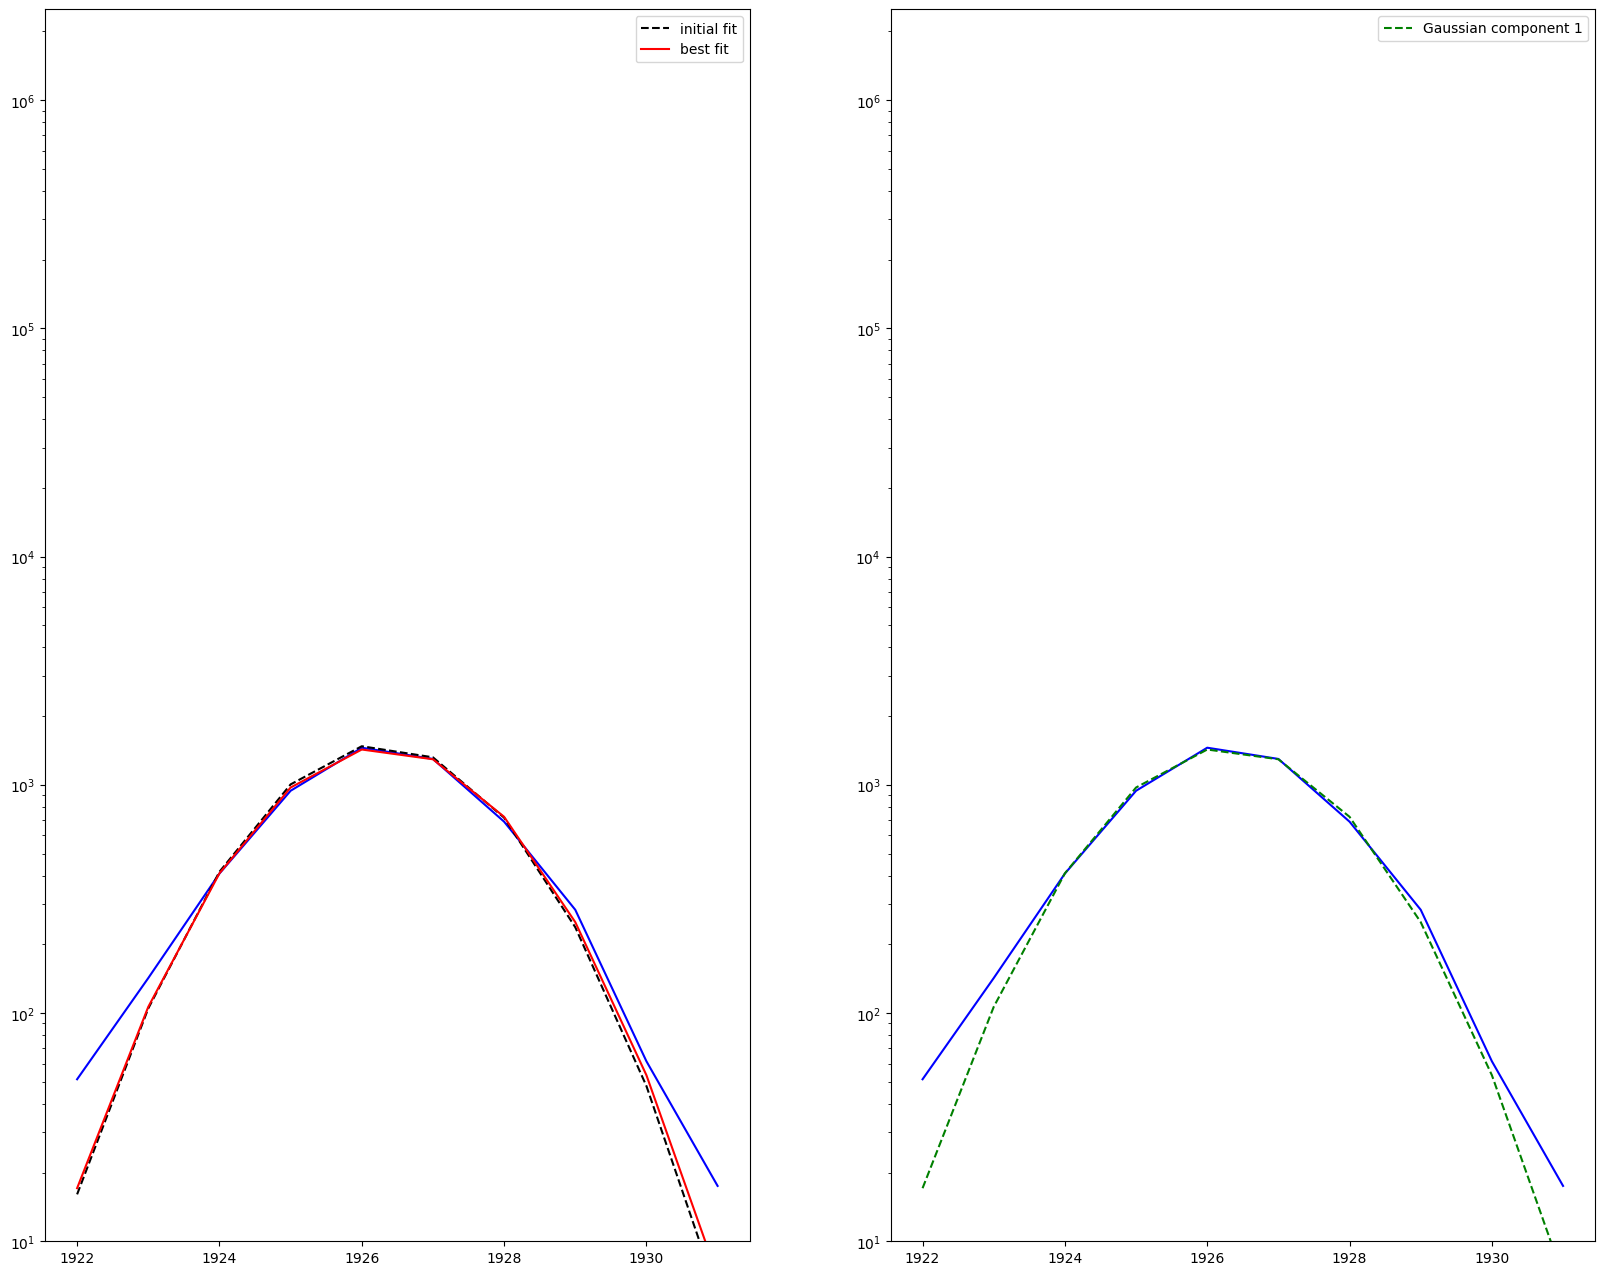

In [36]:
pars = Parameters()

# line_mod = LinearModel(prefix='line_')
# pars.update(line_mod.make_params())
# pars['line_intercept'].set(value=200, min=50, max=400)
# pars['line_slope'].set(value=0, min=-0.001, max=0.001)
                      
# exp_mod = ExponentialModel(prefix='exp_')
# pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())
pars['g1_center'].set(value=c1, min=c1-2, max=c1+2)
pars['g1_sigma'].set(value=s1, min=0.5, max=10)
pars['g1_amplitude'].set(value=a1, min=10)

# mod = gauss1 + gauss2 + line_mod - step_mod
# mod = gauss1 + gauss2 - step_mod
mod = gauss1

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.1))

fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([10, 2.5e6])
axes[1].set_ylim([10, 2.5e6])

axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
# axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
# axes[1].plot(x, comps['line_'], 'k--', label='Linear component')
# axes[1].plot(x, -comps['step_'], 'r--', label='Step component')
# axes[1].plot(x, comps['exp_'], 'k--', label='Exponential component')
axes[1].legend(loc='best')

# plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>

In [37]:
# 2023-Jan-3
# Aqui finalizo este teste:
# Dado um espectro, escolhi o pico mais proeminente do espectro
# e fiz o ajuste gaussianco com lmfit
# No caso, o pico tem área, centroide, SD e FWHM:
# g1_amplitude:  5264.84728 +/- 85.1465566 (1.62%) (init = 5347.497)
# g1_center:     1926.29564 +/- 0.02690572 (0.00%) (init = 1926.275)
# g1_sigma:      1.44040103 +/- 0.02690060 (1.87%) (init = 1.418733)
# g1_fwhm:       3.39188516 +/- 0.06334608 (1.87%) == '2.3548200*g1_sigma'
# g1_height:     1458.18438 +/- 23.5824677 (1.62%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'

# Comparando com saíuda do Genie:
# canal (>0)    En:    FWHM (keV)    net area    net area unc   continuum
# 1927.34      1173.47 2.04          5.40E+003   89.73          8.83E+002
#

In [38]:
out

In [39]:
out.params

name,value,standard error,relative error,initial value,min,max,vary,expression
g1_amplitude,5264.84728,85.1465566,(1.62%),5347.497160537201,10.0000000,inf,True,
g1_center,1926.29564,0.02690572,(0.00%),1926.274908054728,1924.27491,1928.27491,True,
g1_sigma,1.44040103,0.02690060,(1.87%),1.4187332051144015,0.50000000,10.0000000,True,
g1_fwhm,3.39188516,0.06334608,(1.87%),3.340861326067495,-inf,inf,False,2.3548200*g1_sigma
g1_height,1458.18438,23.5824677,(1.62%),1503.695556555438,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [40]:
out.var_names

['g1_amplitude', 'g1_center', 'g1_sigma']

In [41]:
out.params.items()

dict_items([('g1_amplitude', <Parameter 'g1_amplitude', value=5264.8472819797735 +/- 85.1, bounds=[10:inf]>), ('g1_center', <Parameter 'g1_center', value=1926.295636105063 +/- 0.0269, bounds=[1924.274908054728:1928.274908054728]>), ('g1_sigma', <Parameter 'g1_sigma', value=1.440401032769619 +/- 0.0269, bounds=[0.5:10]>), ('g1_fwhm', <Parameter 'g1_fwhm', value=3.3918851599865545 +/- 0.0633, bounds=[-inf:inf], expr='2.3548200*g1_sigma'>), ('g1_height', <Parameter 'g1_height', value=1458.1843778486775 +/- 23.6, bounds=[-inf:inf], expr='0.3989423*g1_amplitude/max(1e-15, g1_sigma)'>)])

In [42]:
out.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
g1_amplitude      5265       10      inf    85.15     True     None     None
g1_center         1926     1924     1928  0.02691     True     None     None
g1_fwhm          3.392     -inf      inf  0.06335    False 2.3548200*g1_sigma     None
g1_height         1458     -inf      inf    23.58    False 0.3989423*g1_amplitude/max(1e-15, g1_sigma)     None
g1_sigma          1.44      0.5       10   0.0269     True     None     None


In [31]:
print('-------------------------------')
print('Parameter    Value       Stderr')
for name, param in out.params.items():
    # print(f'{name:7s} {param.value:11.5f} {param.stderr:11.5f}')
    print(name)
    print(param)
    print(param.value)

KeyError: "None of [Index(['peaks', 'centroids', 'rough_sums'], dtype='object')] are in the [columns]"

In [44]:
def gauss_lmfit_singlet(pkprms, ipk):
    wi_re = pkprms.wide_regions[ipk]
    print(f'pico: {wi_re}')
    x = np.linspace(wi_re[0], wi_re[1], num=wi_re[1]-wi_re[0]+1)
    y = cntarr[wi_re[0]:wi_re[1]+1]
    c1 = pkprms.centroids[ipk]
    s1 = pkprms.propts['widths'][ipk]*pkprms.k_fwhm_to_sd
    a1 = pkprms.rough_sums[ipk]

    parames = Parameters()

    gauss1 = GaussianModel(prefix='g1_')
    parames.update(gauss1.make_params())
    parames['g1_center'].set(value=c1, min=c1-2, max=c1+2)
    parames['g1_sigma'].set(value=s1, min=0.5, max=10)
    parames['g1_amplitude'].set(value=a1, min=10)

    mod = gauss1

    init = mod.eval(parames, x=x)
    out = mod.fit(y, parames, x=x, verbose=False)
    print('Fez.')

    # ret = [param for param in out.params.items()]
    ret = out
    return ret

In [45]:
for ipk in range(len(pkprms.peaks)):
    ret = gauss_lmfit_singlet(pkprms, ipk)
    print(ret)

pico: [27 35]
Fez.
pico: [123 127]
Fez.
pico: [125 131]
Fez.
pico: [142 147]
Fez.
pico: [232 239]
Fez.
pico: [237 243]
Fez.
pico: [394 398]
Fez.
pico: [579 585]
Fez.
pico: [713 717]
Fez.
pico: [734 739]
Fez.
pico: [801 805]
Fez.
pico: [836 848]
Fez.
pico: [957 964]
Fez.
pico: [1000 1006]
Fez.
pico: [1079 1086]
Fez.
pico: [1110 1119]
Fez.
pico: [1127 1132]
Fez.
pico: [1158 1166]
Fez.
pico: [1194 1198]
Fez.
pico: [1252 1260]
Fez.
pico: [1328 1337]
Fez.
pico: [1370 1375]
Fez.
pico: [1450 1458]
Fez.
pico: [1494 1501]
Fez.
pico: [1536 1544]
Fez.
pico: [1582 1588]
Fez.
pico: [1589 1595]
Fez.
pico: [1828 1835]
Fez.
pico: [1835 1844]
Fez.
pico: [1922 1931]
Fez.
pico: [2028 2036]
Fez.
pico: [2182 2192]
Fez.
pico: [2267 2277]
Fez.
pico: [2392 2403]
Fez.
pico: [2467 2473]
Fez.
pico: [2608 2619]
Fez.
pico: [2834 2841]
Fez.
pico: [2890 2899]
Fez.
pico: [3026 3034]
Fez.
pico: [3441 3458]
Fez.
pico: [3610 3621]
Fez.
pico: [4003 4022]
Fez.


In [46]:
ret

In [47]:
ret.params

name,value,standard error,relative error,initial value,min,max,vary,expression
g1_amplitude,164.766808,16.2794842,(9.88%),163.47601797762195,10.0000000,inf,True,
g1_center,4012.13449,0.52497237,(0.01%),4011.885129534331,4009.88513,4013.88513,True,
g1_sigma,4.69883521,0.55596914,(11.83%),2.7466224077416643,0.50000000,10.0000000,True,
g1_fwhm,11.0649111,1.30920726,(11.83%),6.467801378198226,-inf,inf,False,2.3548200*g1_sigma
g1_height,13.9890944,1.35574322,(9.69%),23.744617542990618,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [48]:
for name, param in ret.params.items():
    print(name, param.value, param.stderr)

g1_amplitude 164.76680808345466 16.27948415673123
g1_center 4012.13448511202 0.5249723651639712
g1_sigma 4.698835208482994 0.5559691419627769
g1_fwhm 11.064911125639926 1.3092072550484144
g1_height 13.989094416804104 1.3557432195252896


In [32]:
for ipk in range(len(pkprms.peaks)):
    ret = gauss_lmfit_singlet(pkprms, ipk)
    # ret.params.pretty_print()

KeyError: "None of [Index(['peaks', 'centroids', 'rough_sums'], dtype='object')] are in the [columns]"

In [33]:
ret

KeyError: "None of [Index(['peaks', 'centroids', 'rough_sums'], dtype='object')] are in the [columns]"

In [ ]:
xfgn sr hsrthf srth

In [51]:
my_df.dtypes

NameError: name 'my_df' is not defined

In [52]:
ch_en = ogra.a_spec.channel_energy_calib.p_en

In [53]:
my_df['centrs_en'] = ch_en(my_df['centroids'])
my_df

NameError: name 'my_df' is not defined

In [ ]:

# 2022-Dez-21:
# PAREI AQUI;
# Usar os resultados de áreas dos picos e montar as curvas de eficiência

# 2022-Mar-16
# Fazendo ajuste polinomial nas eficiências:

In [ ]:
from numpy.polynomial import Polynomial as P # 2020-09-06 Esta é a nova classe recomendada 

In [ ]:
En_CV_LoBg = np.array([81.00,
86.54,
121.78,
133.51,
302.85,
344.28,
356.02,
604.69,
661.66,
795.84,
964.13,
1085.91,
1112.12,
1173.24,
1332.50,
1408.01
])
# En_CV_GMX

In [ ]:
Eff_CV_LoBg = np.array([4.4358,
4.4723,
5.4386,
5.5045,
3.1379,
2.8722,
2.7305,
1.7817,
1.6453,
1.4026,
1.1216,
1.0200,
0.9703,
0.8962,
0.8009,
0.7397 ])
Eff_CV_GMX

In [ ]:
unc_perc = np.array([2.01,
1.43,
1.33,
2.11,
1.81,
1.42,
1.41,
2.24,
1.44,
3.68,
1.66,
1.71,
1.58,
0.87,
0.87,
1.51 ])
unc_perc

In [54]:
ln_En_CV_LoBg = np.log (En_CV_LoBg)
ln_Eff_CV_LoBg = np.log (Eff_CV_LoBg)

NameError: name 'En_CV_LoBg' is not defined

In [55]:
N = 16

In [56]:
# 2022-Mar-23
# Parêntese para fazer nova calibração canal-energia do HPGe do projeto:

In [57]:
canal = np.array([210, 920, 1181, 7232])
ener = np.array([46.5, 186, 238.6, 1460.8])

In [58]:
projeto = P.fit(x=canal, y=ener, deg=1).convert()
projeto

NameError: name 'P' is not defined

In [59]:
projeto_ener_canal = P.fit(x=ener, y=canal, deg=1).convert()
projeto_ener_canal

NameError: name 'P' is not defined

In [60]:
projeto_ener_canal(1173.2)

NameError: name 'projeto_ener_canal' is not defined

In [61]:
projeto_ener_canal(1332.486)

NameError: name 'projeto_ener_canal' is not defined

In [62]:
P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5).convert()

NameError: name 'P' is not defined

In [63]:
poly_w = P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5, w=1/unc_perc).convert()
poly_w

NameError: name 'P' is not defined

In [64]:
poly_w = P.fit(x=ln_En_CV_LoBg, y=ln_Eff_CV_LoBg, deg=5, w=1/unc_perc**2).convert()
poly_w

NameError: name 'P' is not defined

In [65]:
print(poly_w)

NameError: name 'poly_w' is not defined

In [66]:
poly_o = P.fit(x=ln_En_CV_LoBg, y=Eff_CV_LoBg, deg=5)
print(poly_o)

NameError: name 'P' is not defined

In [ ]:
weights = np.linspace(1, 2, N)
Xw = X * np.sqrt(weights)[:, None]
yw = y * np.sqrt(weights)
print (linalg.lstsq(Xw, yw)[0])

In [34]:
weights = 1.0 / unc_perc**2.0
weights

NameError: name 'pkprms' is not defined

In [ ]:
Xw = ln_En_CV_LoBg * np.sqrt(weights)[:, None]
yw = ln_Eff_CV_LoBg * np.sqrt(weights)
print (linalg.lstsq(Xw, yw)[0])

In [ ]:
print (linalg.lstsq(Xw, yw))

In [ ]:
X = ln_En_CV_LoBg
y = ln_Eff_CV_LoBg
w1 = linalg.lstsq(X, y)
print (w1)

In [ ]:
np.log(2)

In [ ]:
# Figure 3
figw3 = go.FigureWidget();
figw3.add_trace(
    go.Scatter(x=chans,
               y=ys_net_counts,
               name="Net counts",
               line=dict(color='green',width=0.5)));
figw3.add_trace(
    go.Scatter(x=peaks_net,
               y=ys_net_counts[peaks_net],
               mode="markers",
               name="net peaks",
               marker=dict(color='cyan',
                           symbol='cross',
                           size=15,
                           opacity=0.7,
                           line=dict(color='magenta', width=2.0)
                          )
              ));
figw3.add_trace(
    go.Scatter(x=peaks_1,
               y=counts[peaks_1],
               mode="markers",
               name="gross peaks",
               marker=dict(color='lightblue',
                           symbol='cross',
                           size=15,
                           opacity=0.7,
                           line=dict(color='green', width=2.0)
                          )
              ));
# Set title and scale type
figw3.update_layout(title_text="Gamma-ray net spectrum")
figw3.update_yaxes(type="log");

In [ ]:
figw3.write_html('figw3.html', auto_open=True)

In [ ]:
# Essa será a 1b
figw1 = go.FigureWidget();

# Add Traces

figw1.add_trace(
    go.Scatter(x=chans_nzero,
               y=counts_nzero,
               error_y=dict(
                   color='orange',width=3.0,
                   type='data', # value of error bar given in data coordinates
                   array=unc_y,
                   visible=True),
               name="Counts & uncertaintes",
               line=dict(color='orange',width=0.3)));

figw1.add_trace(
    go.Scatter(x=chans,
               y=eval_y,
               name="eval_y",
               line=dict(color='blue',width=0.5)));

figw1.add_trace(
    go.Scatter(x=peaks_1,
               y=counts[peaks_1],
               mode="markers",
               name="peaks",
               marker=dict(color='cyan',
                           symbol='cross',
                           size=20,
                           opacity=0.5,
                           line=dict(color='red', width=2.0)
                          )
              ));
figw1.add_trace(
    go.Scatter(x=peaks_net,
               y=counts[peaks_net],
               mode="markers",
               name="net peaks",
               marker=dict(color='red',
                           symbol='circle',
                           size=20,
                           opacity=0.4,
                           line=dict(color='green', width=2.0)
                          )
              ));

figw4.add_trace(
    go.Scatter(x=inis,
               y=eval_y[inis],
               mode="markers",
               name="inis",
               marker=dict(color='yellow',
                           symbol='pentagon',
                           size=10,
                           opacity=1.0,
                           line=dict(color='green', width=2.0)
                          )
              ));

figw1.add_trace(
    go.Scatter(x=fins,
               y=eval_y[fins],
               mode="markers",
               name="fins",
               marker=dict(color='cyan',
                           symbol='star-triangle-down',
                           size=10,
                           opacity=1.0,
                           line=dict(color='red', width=2.0)
                          )
              ));

figw1.add_trace(
    go.Scatter(x=xs_step_bline,
               y=ys_step_bline,
               name="Step baseline",
               line=dict(color='navy',width=0.4)));

# Set title and scale type
figw1.update_layout(title_text="Gamma-ray spectrum excerpt")
figw1.update_yaxes(type="log");

# Melhor não abrir inline, que seria simplesmente entrar com o nome do objeto:
# figw2
# Além de ficar com visualização incômoda, não funciona no JupyterLab; dá o erro:
# Error displaying widget: model not found.

In [ ]:
figw4.write_html('figw4.html', auto_open=True)

In [ ]:
# 2022-Dez-28
# Cópia do programa principal com interface, ograyspy_main_ui.py,
# para testes com Pandas

In [ ]:
import sys
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWebEngineWidgets import QWebEngineView
from PyQt5.QtWidgets import *
from css_test import css_test, apply_css

from ograyspy_class import Ograyspy
# from html_window_class import SimpleHtmlViewer

class MainWindow(QMainWindow):
    count = 0

    def __init__(self, parent=None):
        super(MainWindow, self).__init__(parent)
        self.mdi = QMdiArea()

        self.mdi.setHorizontalScrollBarPolicy(Qt.ScrollBarAsNeeded)
        self.mdi.setVerticalScrollBarPolicy(Qt.ScrollBarAsNeeded)
        self.setCentralWidget(self.mdi)

        # self.mdi.subWindowActivated.connect(self.updateMenus)
        self.windowMapper = QSignalMapper(self)
        # self.windowMapper.mapped[QWidget].connect(self.setActiveSubWindow)

        self.setCentralWidget(self.mdi)
        bar = self.menuBar()

        file = bar.addMenu("File")
        file.addAction("New")
        file.addAction("Open")
        file.addAction("Pandas-generate an_html_file.html")
        file.addAction("Show spectrum graphic")
        file.addAction("Show Pandas dataframe")
        file.addAction("cascade")
        file.addAction("Tiled")
        file.addAction("Exit")
        file.triggered[QAction].connect(self.windowaction)
        self.setWindowTitle("MDI demo")

    def windowaction(self, q):
        print("triggered")

        if q.text() == "New":
            MainWindow.count = MainWindow.count + 1
            sub = QMdiSubWindow()
            sub.setWidget(QTextEdit())
            sub.setWindowTitle("subwindow" + str(MainWindow.count))
            self.mdi.addSubWindow(sub)
            sub.show()

        if q.text() == "Open":
            fileName, _ = QFileDialog.getOpenFileName(self)
            if fileName:
                # This is a hack...
                # existing = self.findMdiChild(fileName)
                existing = True
                if existing:
                    MainWindow.count = MainWindow.count + 1
                    sub = QMdiSubWindow()
                    sub.setWidget(QTextEdit())
                    # sub.setWindowTitle("subwindow" + str(MainWindow.count))
                    sub.setWindowTitle(fileName)
                    self.mdi.addSubWindow(sub)
                    sub.show()

        if q.text() == "Pandas-generate an_html_file.html":
            fileName, _ = QFileDialog.getOpenFileName(self)
            if fileName:
                # This is a hack...
                # existing = self.findMdiChild(fileName)
                existing = True
                if existing:
                    ogra = Ograyspy(batch_mode=False)
                    # to_be_found = 'Genie_Transfer'
                    # print('\nogra.define_files_folder(to_be_found)')
                    # ogra.define_files_folder(to_be_found)
                    ogra.a_spec_name = fileName
                    # AQUI: ativar gener_dataframe qdo estiver pronto.
                    ogra.perform_total_analysis(peak_sd_fact=3.0, gener_dataframe=True)
                    ogra.a_spec.spec_pks_df.to_html(buf='an_html_file.html')
                    # print(ogra.a_spec.spec_pks_df)

                    MainWindow.count = MainWindow.count + 1
                    sub = QMdiSubWindow()
                    web = QWebEngineView()
                    # web.load(QUrl("file:///C:/Users/mmaduar/PycharmProjects/OGRaySpY/src/my_file.html"))
                    apply_css(ogra.a_spec.spec_pks_df)
                    web.load(QUrl("file:///C:/Users/mmaduar/PycharmProjects/OGRaySpY/src/an_html_file.html"))
                    # 2022-Dez-27 PAREI AQUI:
                    # - passar a saída de to_html como string?
                    # - O html pode ser renderizado com sucesso, inclusive com css
                    # - porém, parece que o SEI não aceita css. Paciência.

                    # web.load(ogra.dataframe_html_string)
                    # css_test()
                    sub.setWidget(web)
                    sub.setWindowTitle("subwindow" + str(MainWindow.count))
                    self.mdi.addSubWindow(sub)
                    sub.show()

        if q.text() == "Show spectrum graphic":
            MainWindow.count = MainWindow.count + 1
            sub = QMdiSubWindow()
            web = QWebEngineView()
            web.load(QUrl("file:///C:/Users/mmaduar/PycharmProjects/OGRaySpY/src/gross_counts_graph.html"))
            sub.setWidget(web)
            sub.setWindowTitle("subwindow" + str(MainWindow.count))
            self.mdi.addSubWindow(sub)
            sub.show()

        if q.text() == "Show Pandas dataframe":
            MainWindow.count = MainWindow.count + 1
            sub = QMdiSubWindow()
            web = QWebEngineView()
            web.load(QUrl("file:///C:/Users/mmaduar/PycharmProjects/OGRaySpY/src/my_file.html"))
            # 2022-Dez-23 PAREI AQUI - passar a saída de to_html como string
            # web.load(ogra.dataframe_html_string)
            css_test()
            sub.setWidget(web)
            sub.setWindowTitle("subwindow" + str(MainWindow.count))
            self.mdi.addSubWindow(sub)
            sub.show()

        if q.text() == "cascade":
            self.mdi.cascadeSubWindows()

        if q.text() == "Tiled":
            self.mdi.tileSubWindows()

        if q.text() == "Exit":
            QApplication.instance().exit()

    def findMdiChild(self, fileName):
        canonicalFilePath = QFileInfo(fileName).canonicalFilePath()

        for window in self.mdiArea.subWindowList():
            if window.widget().currentFile() == canonicalFilePath:
                return window
        return None


def main():
    app = QApplication(sys.argv)
    ex = MainWindow()
    ex.show()
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()


In [ ]:
dir()